# 第1回・量子コンピュータを触る

#### 1. QISKITのインストール

In [1]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, Aer
from qiskit.visualization import plot_bloch_multivector

#### 2. 量子ビットを操作する

In [24]:
# 量子回路を作るためのボード的なものを作成
qc = QuantumCircuit()

In [25]:
# 量子ビットを作成する（初期状態はゼロ（上向き））
qr = QuantumRegister(1)  # 量子ビットを１つ（何個使えるかはものによる、フリーのものなら5つぐらい）

In [26]:
# 量子ビットを量子回路にセットする
qc.add_register(qr)

In [27]:
# 量子ビットを反転させる
qc.x(qr[0])

In [28]:
# 量子回路の様子を確認
qc.draw()

┌───┐
q1: ┤ X ├
    └───┘

In [29]:
# シミュレーターを定義
sim = Aer.get_backend('statevector_simulator')

# シミュレーションを行う
res = sim.run(qc).result()

# シミュレーションの状態を確認する
state = res.data()['statevector']

In [30]:
print(state)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


- 'state'の結果の第１成分は「０っぽさ」を、第２成分は「１っぽさ」を表す。より正確には、確率振幅という概念。

In [31]:
from qiskit.visualization import array_to_latex
array_to_latex(state, prefix='state = ')

<IPython.core.display.Latex object>

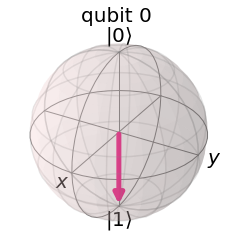

In [32]:
plot_bloch_multivector(state)

- 0と1の確率を50:50にする

In [33]:
qc = QuantumCircuit()
qr = QuantumRegister(1)
qc.add_register(qr)
qc.h(qr[0])  # ここをhにする（アダマール回路？）
qc.draw()

┌───┐
q2: ┤ H ├
    └───┘

In [35]:
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
print(state)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [36]:
array_to_latex(state, prefix='state = ')

<IPython.core.display.Latex object>

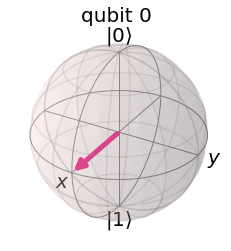

In [37]:
plot_bloch_multivector(state)

- 重ね合わせの状態を確認

In [38]:
from qiskit import ClassicalRegister

In [45]:
qc = QuantumCircuit()
qr = QuantumRegister(1)
qc.add_register(qr)
qc.h(qr[0])

In [46]:
# 古典回路を追加
cr = ClassicalRegister(1)
qc.add_register(cr)

# 測定結果を観測（measure）する
qc.measure(qr[0], cr[0])
qc.draw()

┌───┐┌─┐
q4: ┤ H ├┤M├
    └───┘└╥┘
c3: ══════╩═

In [47]:
sim = Aer.get_backend('qasm_simulator')
res = sim.run(qc, shots = 1000).result()
res.get_counts()

{'0': 480, '1': 520}

- 量子ビットを２つにする

In [51]:
qc = QuantumCircuit()
qr = QuantumRegister(2)
qc.add_register(qr)

# control x（制御x）を導入
qc.cx(qr[0], qr[1])
qc.draw()

q8_0: ──■──
      ┌─┴─┐
q8_1: ┤ X ├
      └───┘

In [54]:
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state = ')

<IPython.core.display.Latex object>

- 1つめの量子ビットを反転させる

In [55]:
qc = QuantumCircuit()
qr = QuantumRegister(2)
qc.add_register(qr)

# 1つめの量子ビットを反転
qc.x(qr[0])

# control x（制御x）を導入
qc.cx(qr[0], qr[1])
qc.draw()

┌───┐     
q9_0: ┤ X ├──■──
      └───┘┌─┴─┐
q9_1: ─────┤ X ├
           └───┘

In [56]:
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state = ')

<IPython.core.display.Latex object>

- 重ね合わせをアダマール回路で表現

In [77]:
qc = QuantumCircuit()
qr = QuantumRegister(2)
qc.add_register(qr)

# 重ね合わせを表現するためにアダマール回路を追加
qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.draw()

┌───┐     
q14_0: ┤ H ├──■──
       └───┘┌─┴─┐
q14_1: ─────┤ X ├
            └───┘

In [78]:
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state = ')

<IPython.core.display.Latex object>

In [79]:
# 観測結果を測定する回路を追加
cr = ClassicalRegister(2)
qc.add_register(cr)
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

In [80]:
qc.draw()

┌───┐     ┌─┐   
q14_0: ┤ H ├──■──┤M├───
       └───┘┌─┴─┐└╥┘┌─┐
q14_1: ─────┤ X ├─╫─┤M├
            └───┘ ║ └╥┘
c11_0: ═══════════╩══╬═
                     ║ 
c11_1: ══════════════╩═

In [81]:
sim = Aer.get_backend('qasm_simulator')
res = sim.run(qc, shots=1000).result()
res.get_counts()

{'11': 498, '00': 502}